# Dimensionality Reduction using PCA
This notebook applies Principal Component Analysis (PCA) to reduce high-dimensional data to 2D for visualization.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("iris_dataset.csv")
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the results
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y
df_pca.head()


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


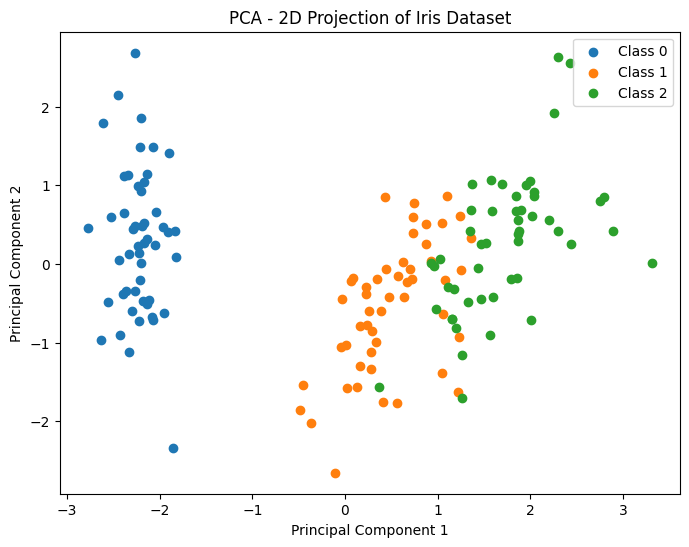

In [3]:

# Scatter plot of the PCA results
plt.figure(figsize=(8,6))
for label in df_pca["target"].unique():
    plt.scatter(df_pca[df_pca["target"] == label]["PC1"],
                df_pca[df_pca["target"] == label]["PC2"],
                label=f"Class {label}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of Iris Dataset")
plt.legend()
plt.show()
